# 🧠 Project 2 - Decision Tree Classifier
This notebook demonstrates how to prepare data, train decision trees, visualize them, and evaluate performance on the UCI Heart Disease dataset.

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn graphviz

In [2]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
from prepare_training_data import prepare_splits, train_all_models, evaluate_all
# from decision_tree_model import train_and_visualize_trees, evaluate_models
from visualize import visualize_all, plot_class_distributions, plot_original_distribution
from visualize import analyze_accuracy_vs_depth
from graphviz import Digraph

In [3]:
# check which datasets can be imported
# list_available_datasets()

# import dataset
heart_disease = fetch_ucirepo(id=45)

# access data
X = heart_disease.data.features
y = heart_disease.data.targets

print(X)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

In [4]:
#Change all targets that are greater than 1 into 1
y = (y >= 1).astype(int)
#Combine X and y into one DataFrame
df = pd.concat([X, y], axis=1)

#Write to CSV
df.to_csv("Data/heart_disease.csv", index=False)

# access variable info in tabular format
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [5]:
dataset_path = "Data/heart_disease.csv"

In [6]:
# Initialization
hp_df = pd.read_csv(dataset_path)
# X: columns that are not target
    # "target": Determine target
    # axis=1: 1 if we want to remove column(target), 0 if we want to remove row
X = hp_df.drop("num", axis=1)
# y: column that is target
y = hp_df["num"]

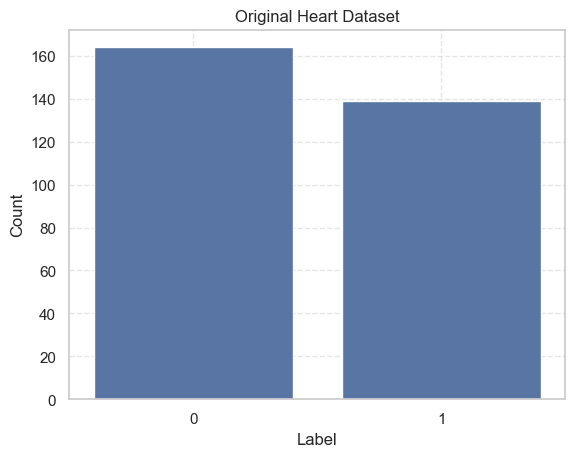

In [7]:
# Show the chart of original data
plot_original_distribution(y, "Original Heart Dataset")

In [8]:
# set up the proportions
splits = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
# Implement preparing data 
datasets = prepare_splits(X, y, splits)

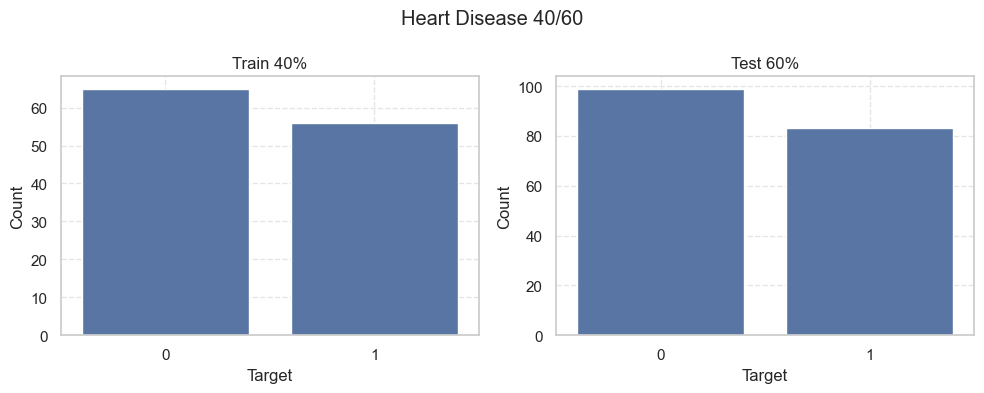

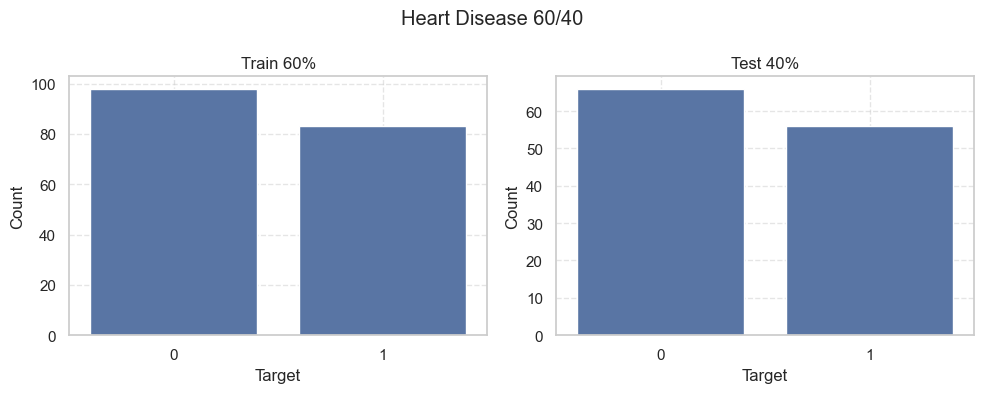

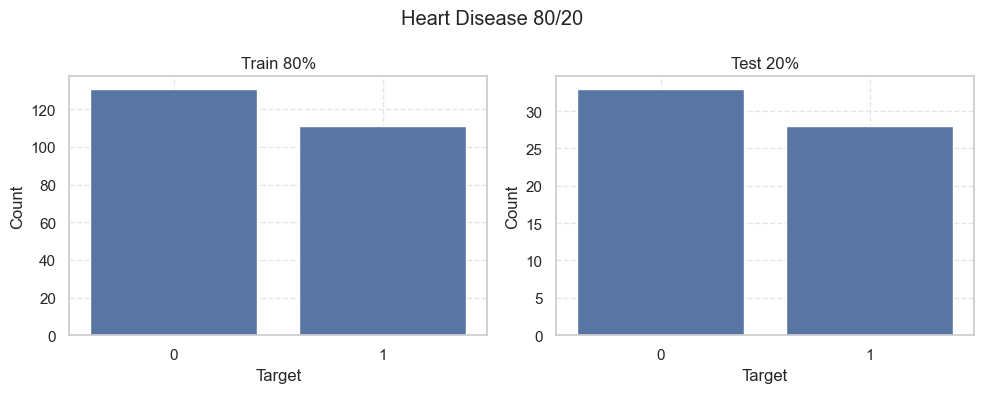

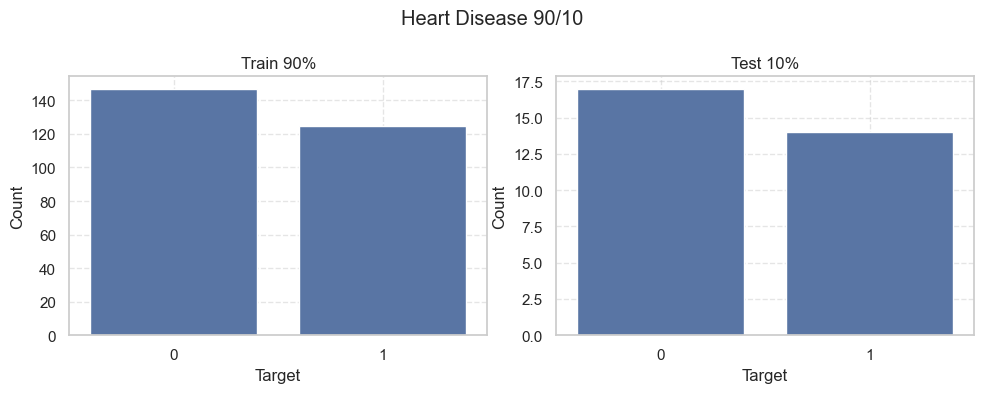

In [9]:
# show charts of datasets after we "preparing" 
plot_class_distributions(datasets, splits, "Heart Disease")


In [10]:
print(datasets)

[(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
22    58    1   2       120   284    0        2      160      0      1.8   
301   57    0   2       130   236    0        2      174      0      0.0   
250   57    1   4       110   201    0        0      126      1      1.5   
71    67    1   4       125   254    1        0      163      0      0.2   
200   50    0   4       110   254    0        2      159      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
52    44    1   4       112   290    0        2      153      0      0.0   
103   71    0   3       110   265    1        2      130      0      0.0   
9     53    1   4       140   203    1        2      155      1      3.1   
43    59    1   3       150   212    1        0      157      0      1.6   
7     57    0   4       120   354    0        0      163      1      0.6   

     slope   ca  thal  
22       2  0.0   3.0  
301      2  1.0   3.0  
250      2  0

🌲 Tree 1



(process:19696): Pango-CRITICAL **: 10:34:36.140: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:19696): Pango-CRITICAL **: 10:34:36.140: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:19696): Pango-CRITICAL **: 10:34:36.140: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:19696): Pango-CRITICAL **: 10:34:36.140: pango_font_description_get_family: assertion 'desc != NULL' failed


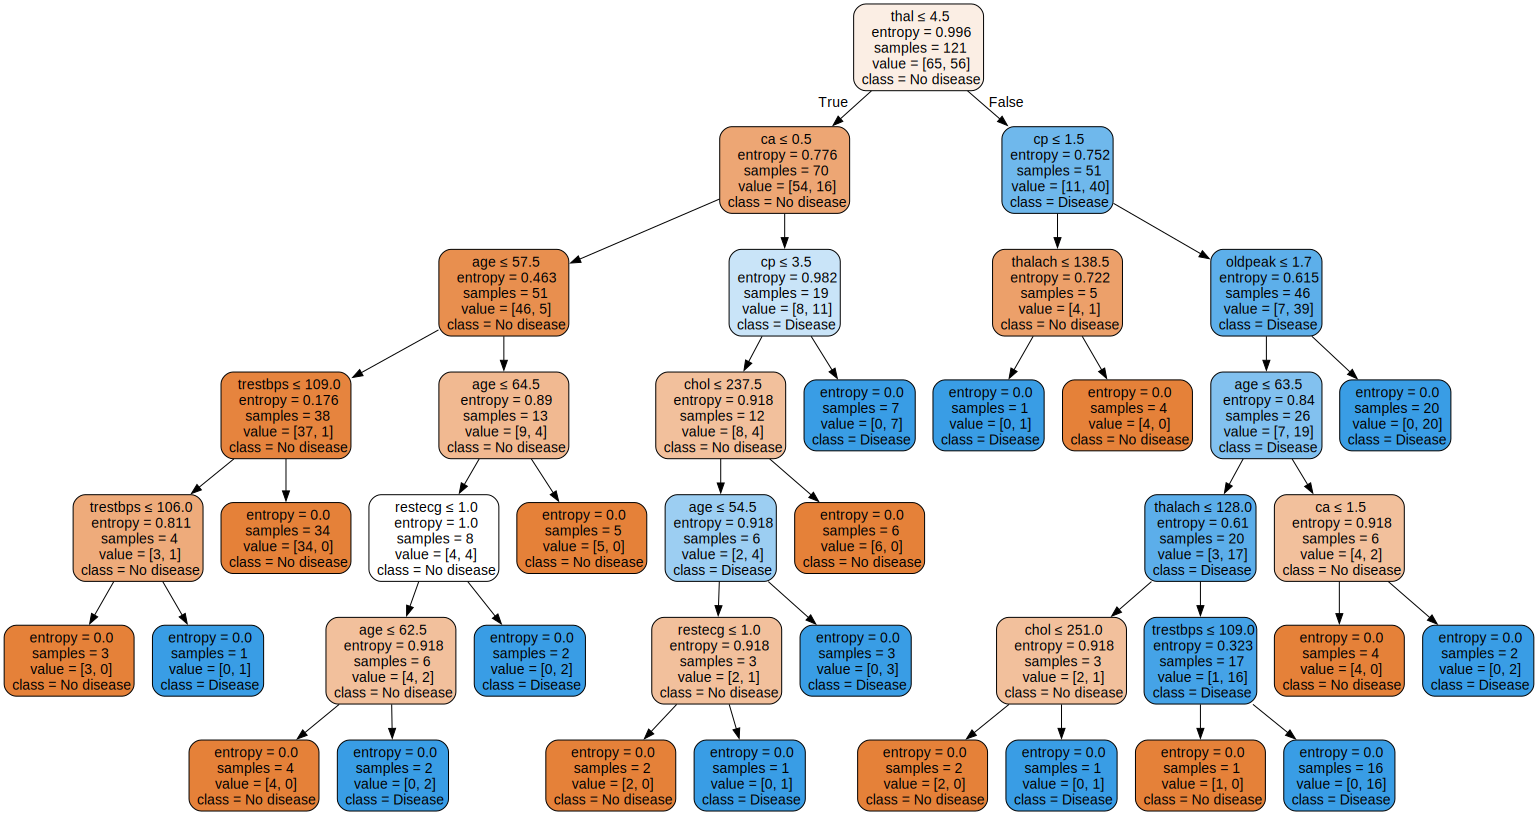

🌲 Tree 2



(process:8536): Pango-CRITICAL **: 10:34:36.733: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:8536): Pango-CRITICAL **: 10:34:36.733: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:8536): Pango-CRITICAL **: 10:34:36.733: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:8536): Pango-CRITICAL **: 10:34:36.733: pango_font_description_get_family: assertion 'desc != NULL' failed


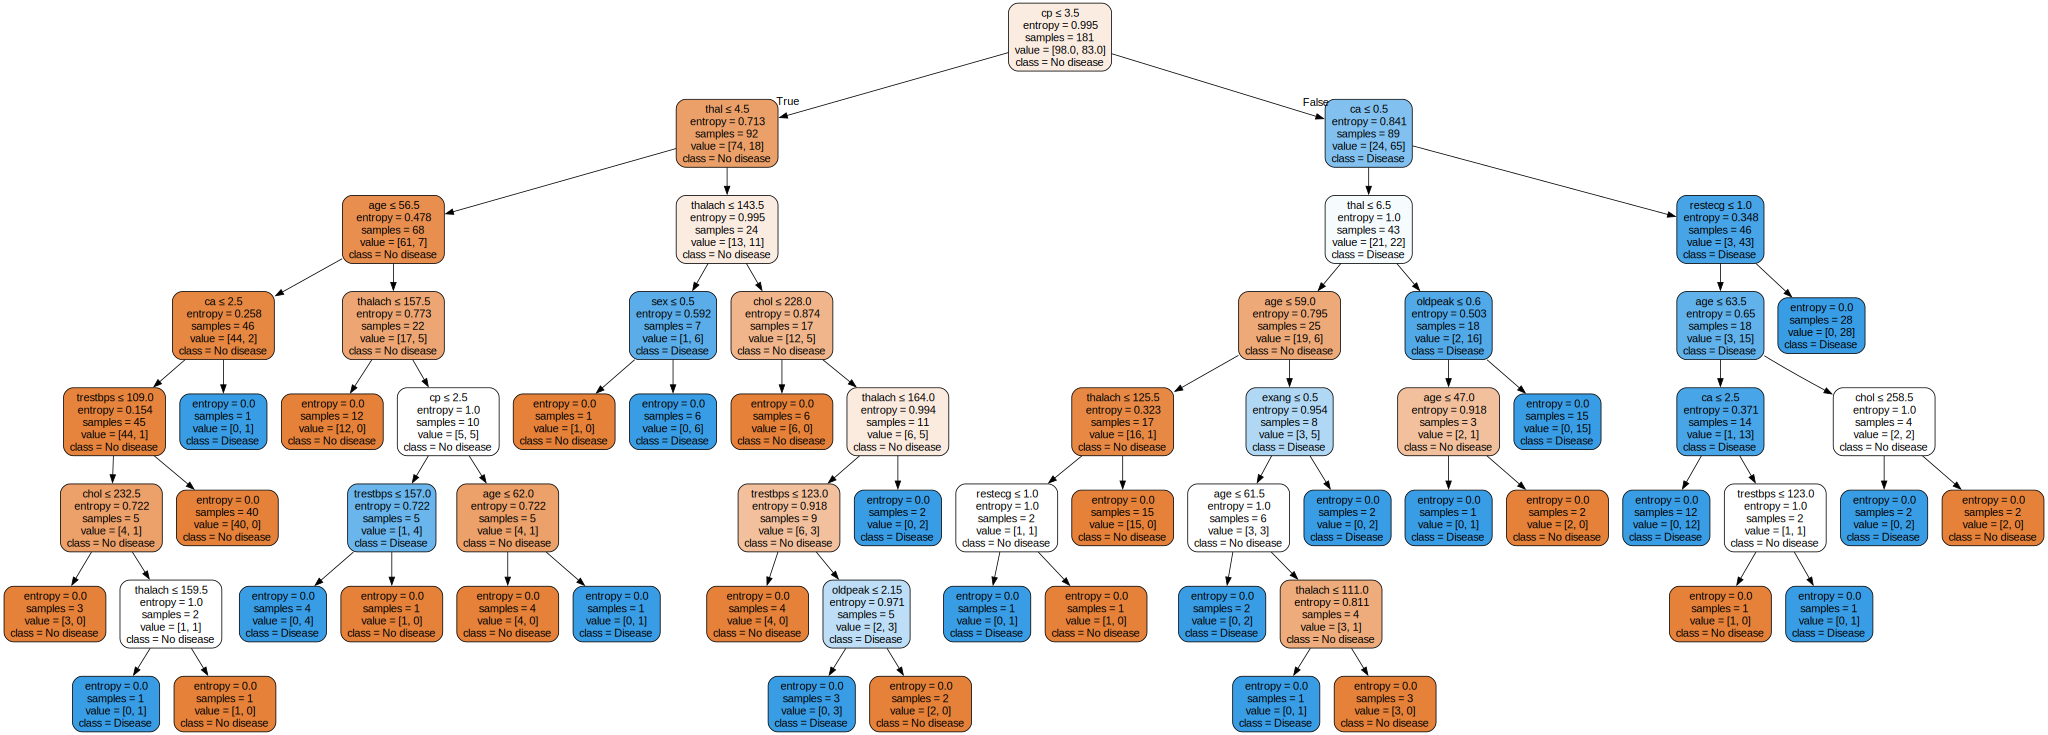

🌲 Tree 3



(process:25560): Pango-CRITICAL **: 10:34:37.410: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:25560): Pango-CRITICAL **: 10:34:37.410: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:25560): Pango-CRITICAL **: 10:34:37.410: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:25560): Pango-CRITICAL **: 10:34:37.410: pango_font_description_get_family: assertion 'desc != NULL' failed


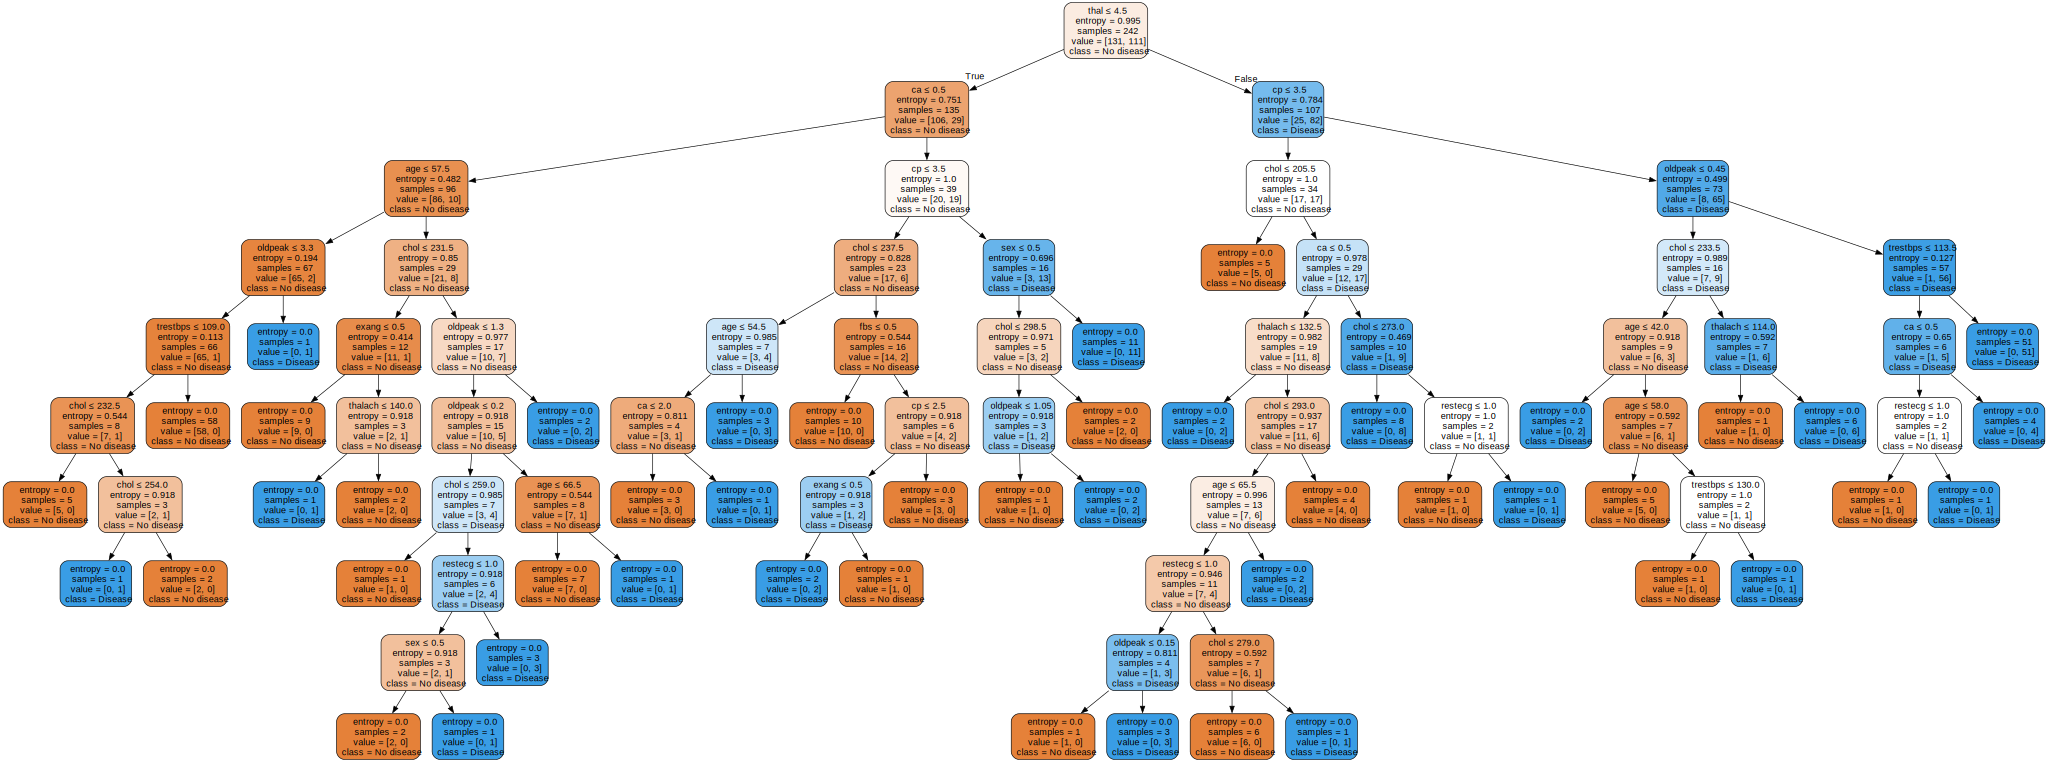

🌲 Tree 4



(process:13392): Pango-CRITICAL **: 10:34:38.126: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13392): Pango-CRITICAL **: 10:34:38.126: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13392): Pango-CRITICAL **: 10:34:38.126: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13392): Pango-CRITICAL **: 10:34:38.126: pango_font_description_get_family: assertion 'desc != NULL' failed


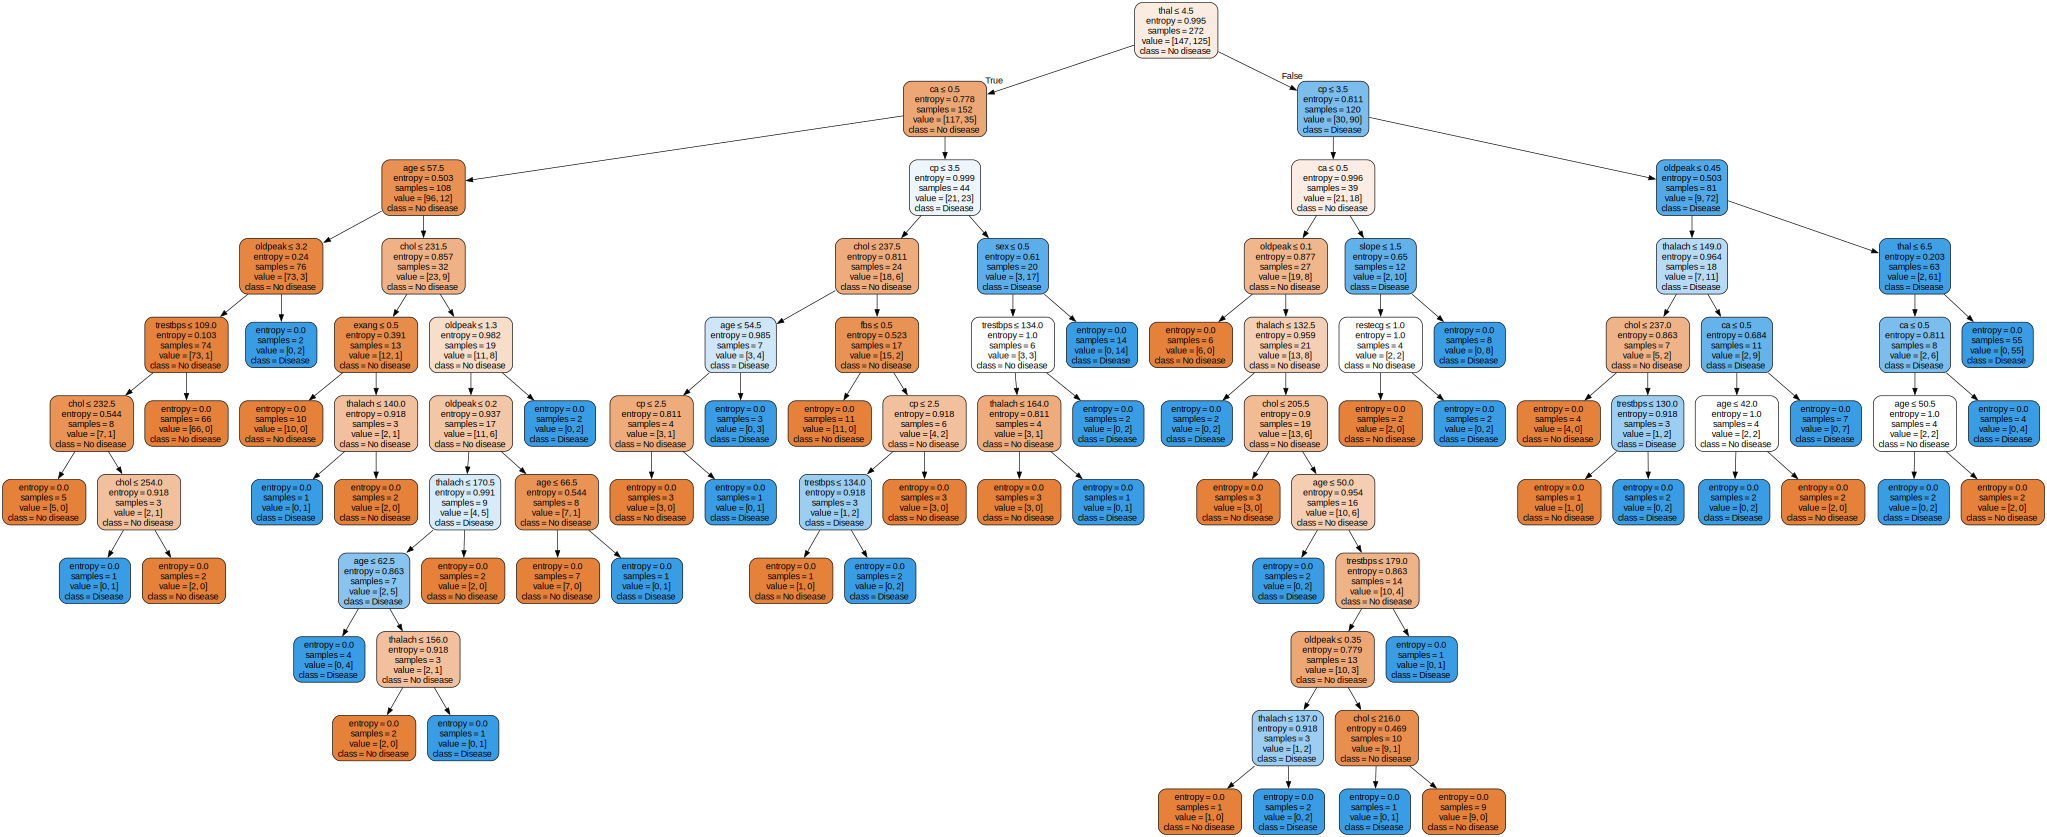

In [11]:
# train data
clfs = train_all_models(datasets)
# visualize the trees based on trained models of datasets (clfs)
visualize_all(clfs, feature_names=X.columns.tolist(), class_names=["No disease", "Disease"])

📊 Evaluation Tree 1: (39.9% train)
              precision    recall  f1-score   support

  No disease       0.80      0.68      0.73        99
     Disease       0.67      0.80      0.73        83

    accuracy                           0.73       182
   macro avg       0.74      0.74      0.73       182
weighted avg       0.74      0.73      0.73       182



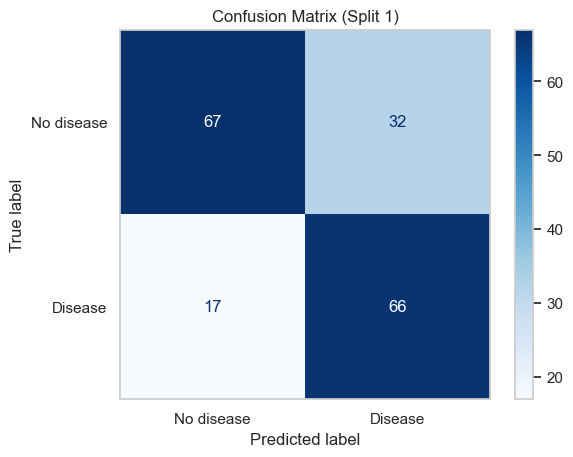

📊 Evaluation Tree 2: (59.7% train)
              precision    recall  f1-score   support

  No disease       0.79      0.74      0.77        66
     Disease       0.72      0.77      0.74        56

    accuracy                           0.75       122
   macro avg       0.75      0.76      0.75       122
weighted avg       0.76      0.75      0.75       122



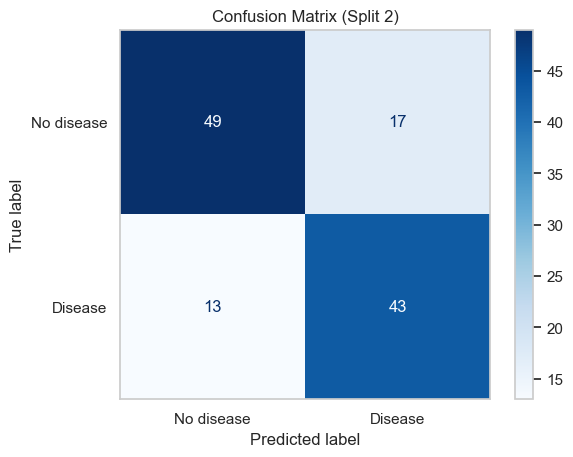

📊 Evaluation Tree 3: (79.9% train)
              precision    recall  f1-score   support

  No disease       0.88      0.67      0.76        33
     Disease       0.69      0.89      0.78        28

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



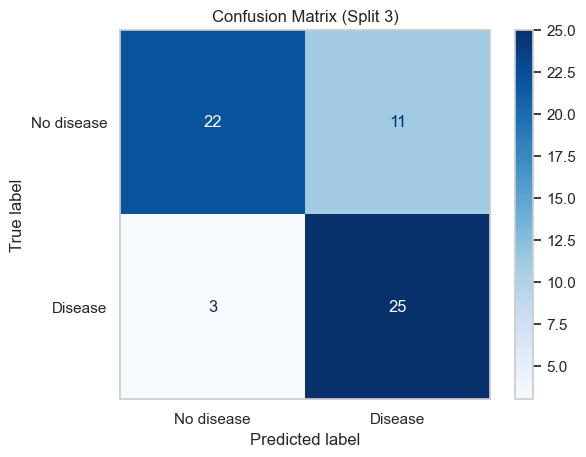

📊 Evaluation Tree 4: (89.8% train)
              precision    recall  f1-score   support

  No disease       0.91      0.59      0.71        17
     Disease       0.65      0.93      0.76        14

    accuracy                           0.74        31
   macro avg       0.78      0.76      0.74        31
weighted avg       0.79      0.74      0.74        31



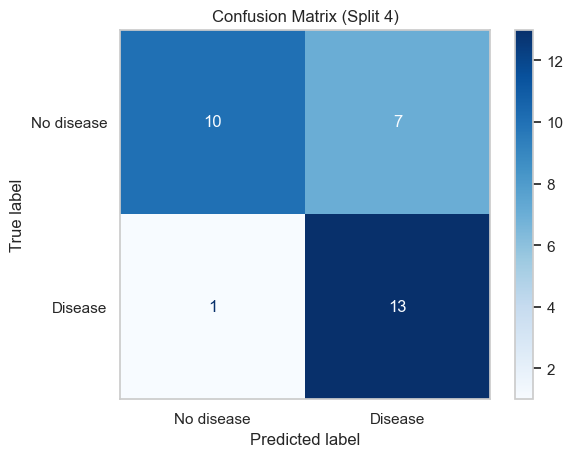

In [12]:
evaluate_all(clfs, datasets, class_names=["No disease", "Disease"])


🌲 Decision Tree with max_depth = None, Accuracy = 0.7705



(process:23268): Pango-CRITICAL **: 10:34:39.343: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23268): Pango-CRITICAL **: 10:34:39.343: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23268): Pango-CRITICAL **: 10:34:39.343: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23268): Pango-CRITICAL **: 10:34:39.343: pango_font_description_get_family: assertion 'desc != NULL' failed


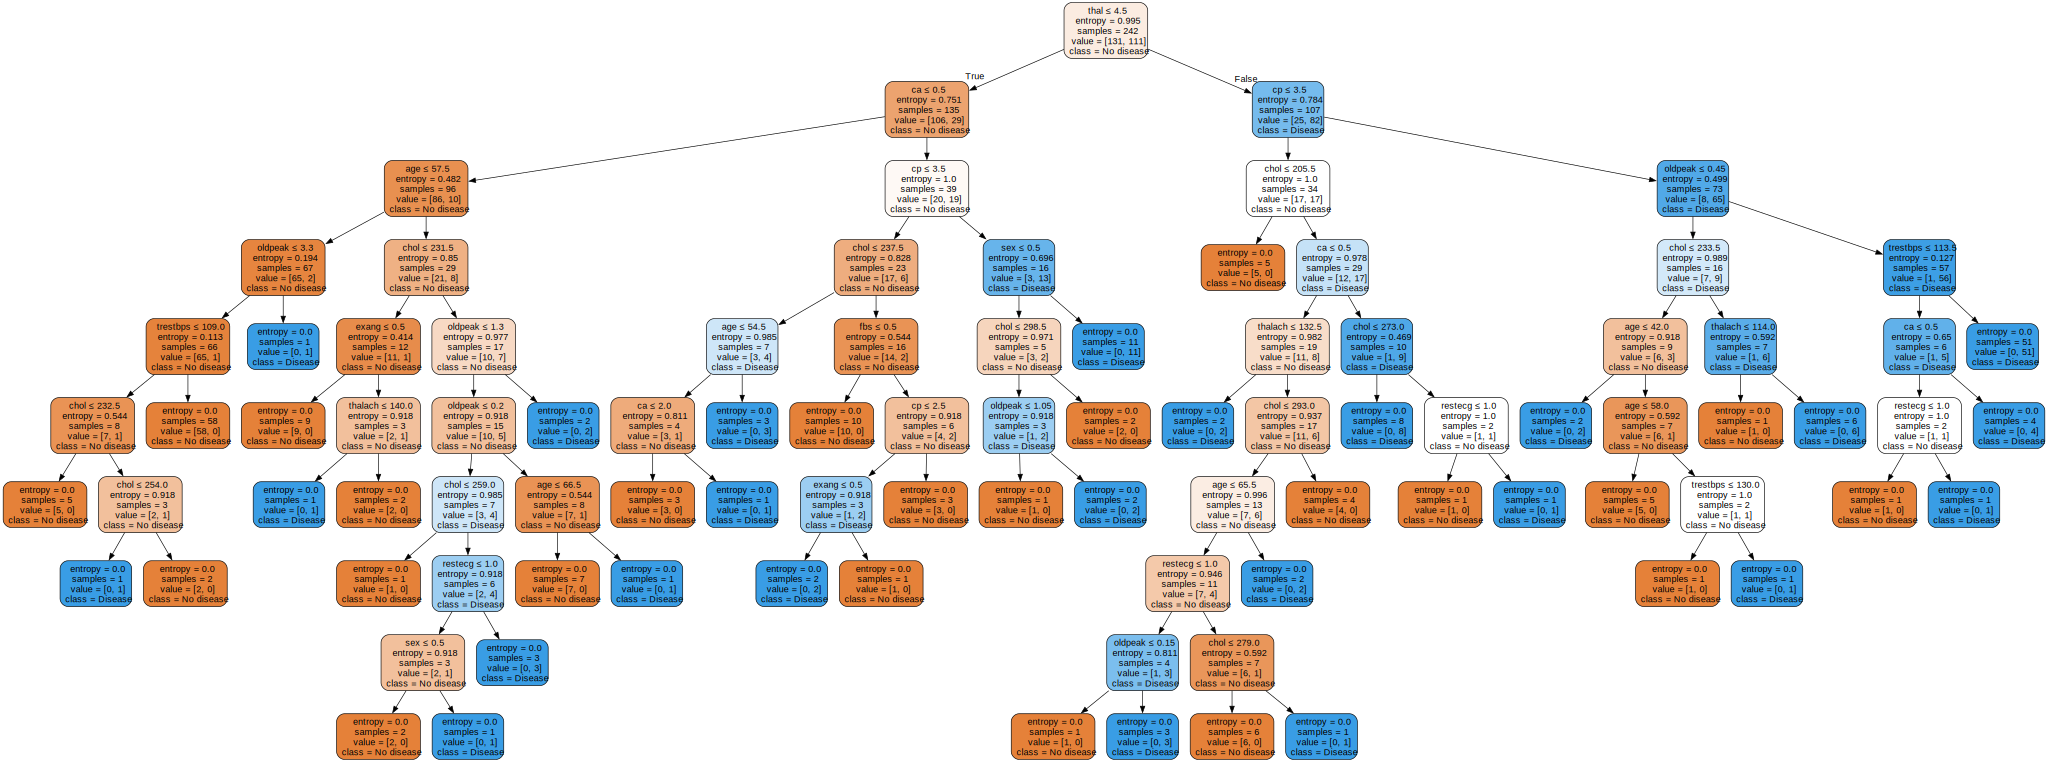

🌲 Decision Tree with max_depth = 2, Accuracy = 0.7705



(process:17580): Pango-CRITICAL **: 10:34:39.992: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17580): Pango-CRITICAL **: 10:34:39.992: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17580): Pango-CRITICAL **: 10:34:39.992: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17580): Pango-CRITICAL **: 10:34:39.992: pango_font_description_get_family: assertion 'desc != NULL' failed


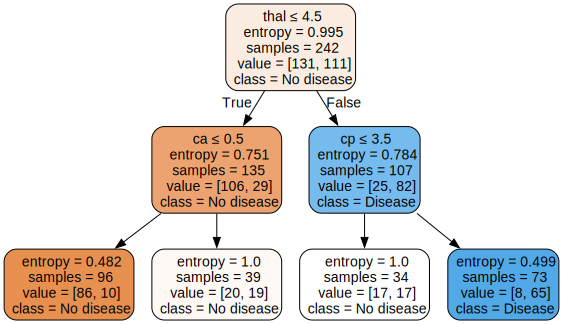

🌲 Decision Tree with max_depth = 3, Accuracy = 0.7869



(process:5636): Pango-CRITICAL **: 10:34:40.549: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5636): Pango-CRITICAL **: 10:34:40.549: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5636): Pango-CRITICAL **: 10:34:40.549: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5636): Pango-CRITICAL **: 10:34:40.549: pango_font_description_get_family: assertion 'desc != NULL' failed


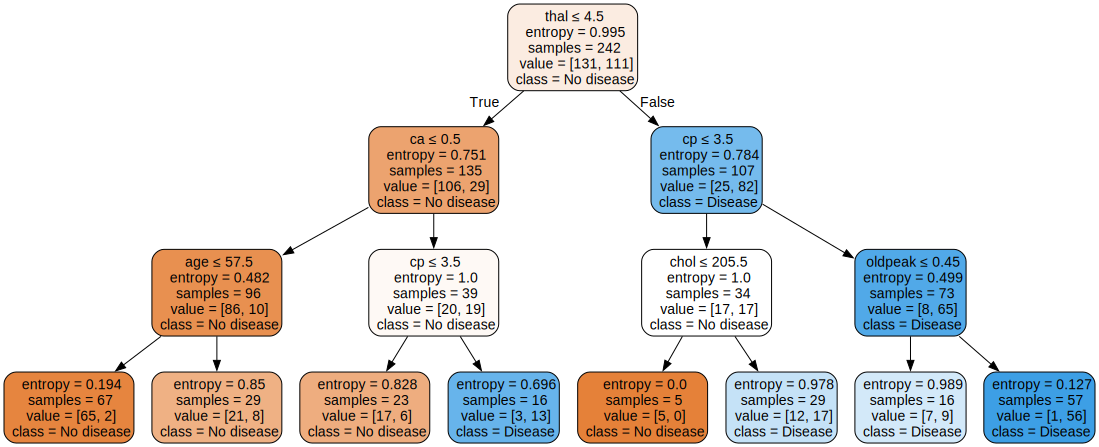

🌲 Decision Tree with max_depth = 4, Accuracy = 0.7869



(process:18112): Pango-CRITICAL **: 10:34:41.165: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:18112): Pango-CRITICAL **: 10:34:41.165: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:18112): Pango-CRITICAL **: 10:34:41.165: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:18112): Pango-CRITICAL **: 10:34:41.165: pango_font_description_get_family: assertion 'desc != NULL' failed


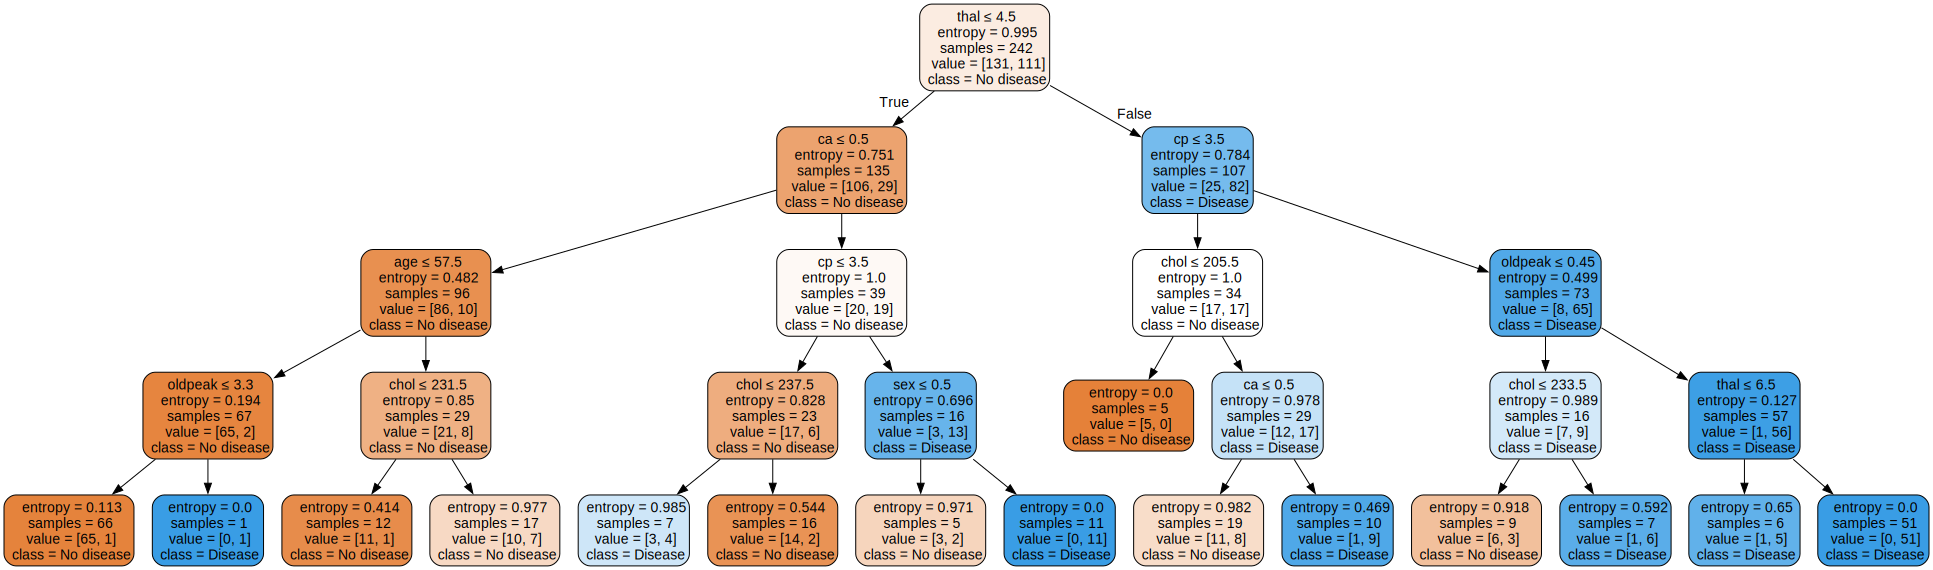

🌲 Decision Tree with max_depth = 5, Accuracy = 0.8033



(process:15712): Pango-CRITICAL **: 10:34:41.744: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15712): Pango-CRITICAL **: 10:34:41.744: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15712): Pango-CRITICAL **: 10:34:41.744: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15712): Pango-CRITICAL **: 10:34:41.744: pango_font_description_get_family: assertion 'desc != NULL' failed


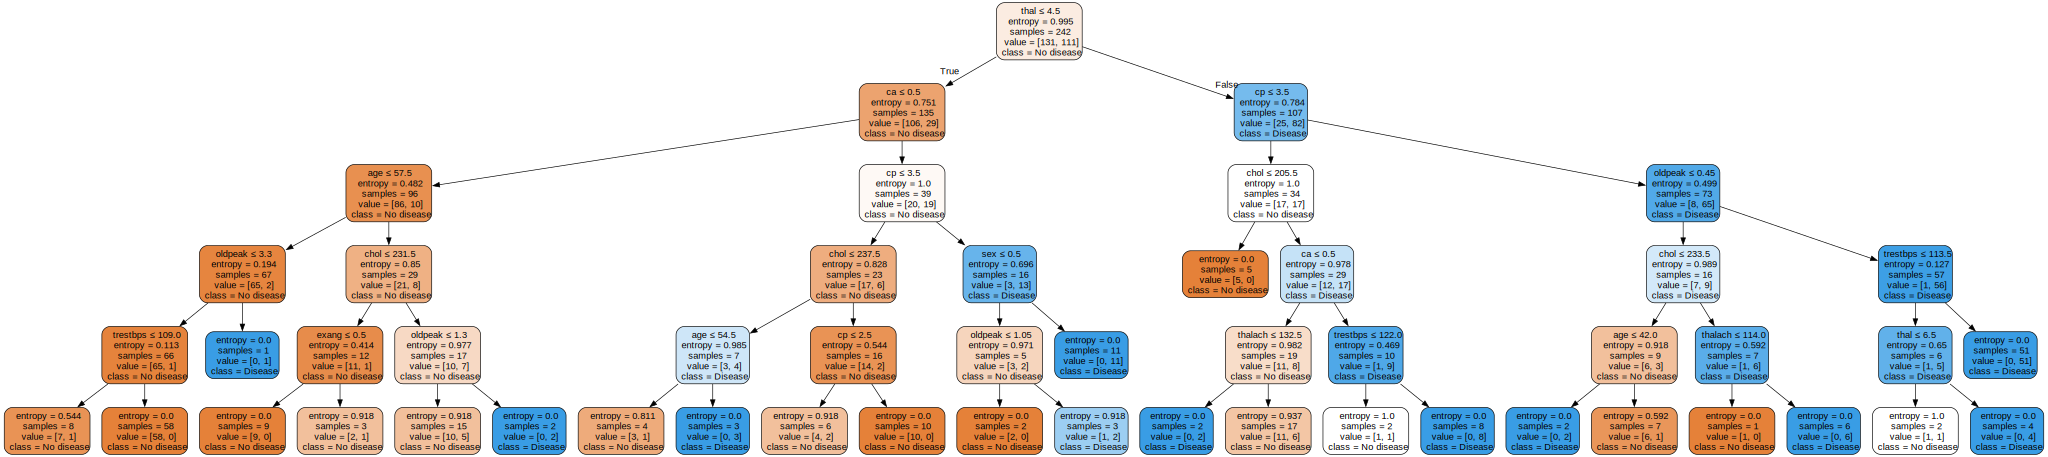

🌲 Decision Tree with max_depth = 6, Accuracy = 0.7049



(process:23120): Pango-CRITICAL **: 10:34:42.330: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23120): Pango-CRITICAL **: 10:34:42.330: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23120): Pango-CRITICAL **: 10:34:42.330: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23120): Pango-CRITICAL **: 10:34:42.330: pango_font_description_get_family: assertion 'desc != NULL' failed


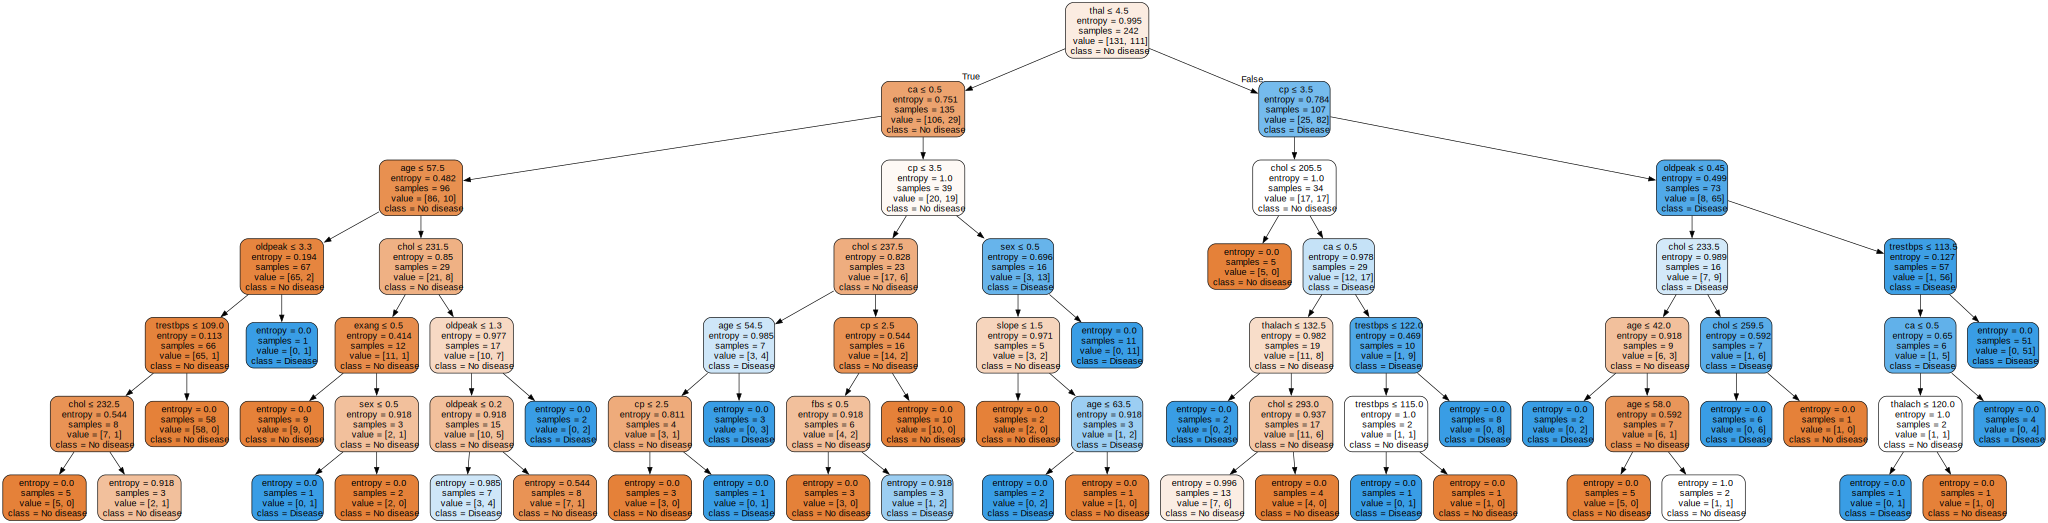

🌲 Decision Tree with max_depth = 7, Accuracy = 0.6885



(process:23100): Pango-CRITICAL **: 10:34:42.927: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23100): Pango-CRITICAL **: 10:34:42.927: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23100): Pango-CRITICAL **: 10:34:42.927: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23100): Pango-CRITICAL **: 10:34:42.927: pango_font_description_get_family: assertion 'desc != NULL' failed


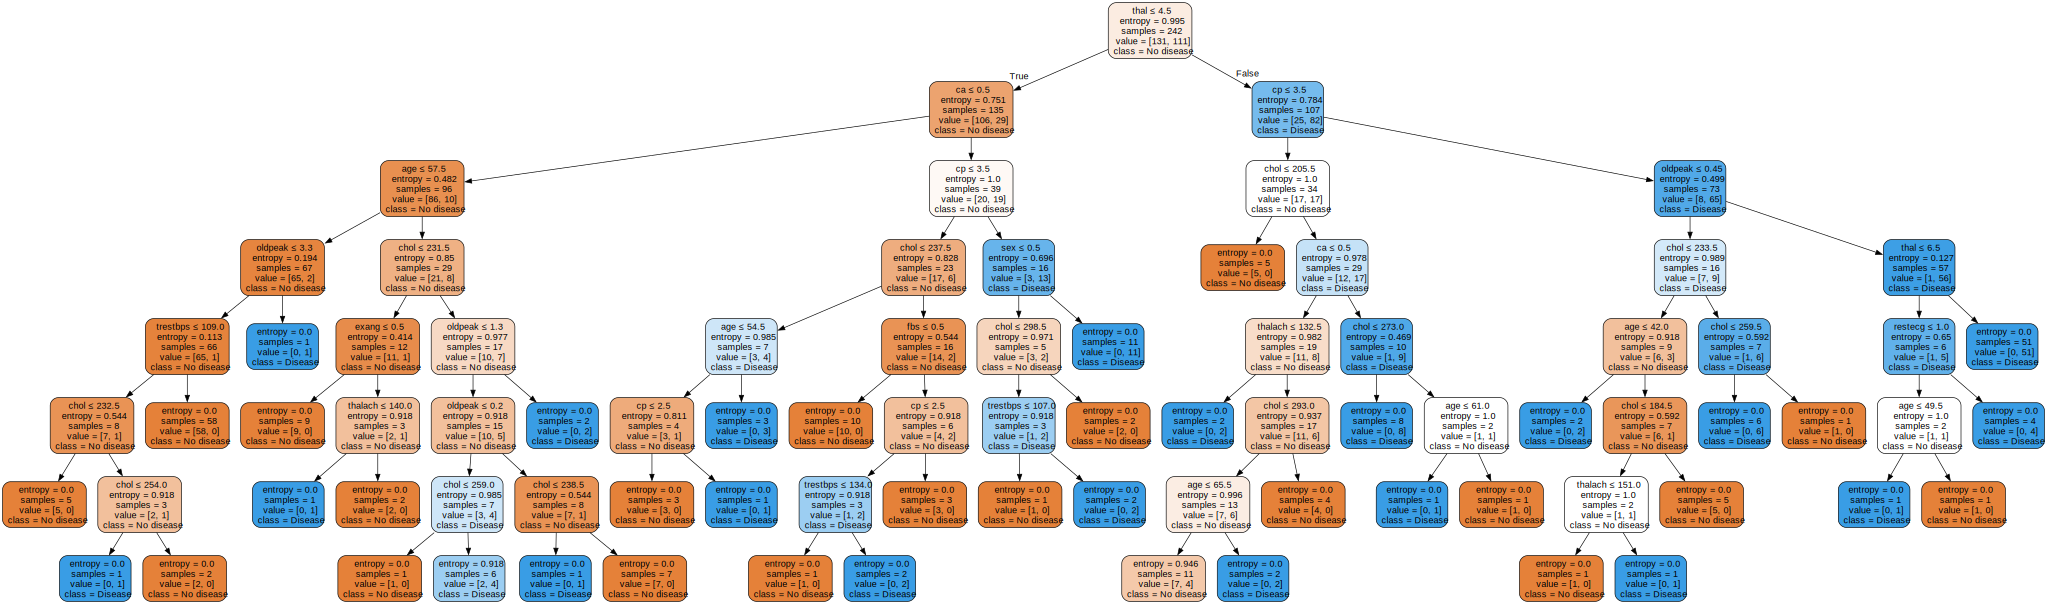

  max_depth  accuracy
0      None  0.770492
1         2  0.770492
2         3  0.786885
3         4  0.786885
4         5  0.803279
5         6  0.704918
6         7  0.688525


In [13]:
X_train, X_test, y_train, y_test = datasets[2]  # 80/20 split

results_df = analyze_accuracy_vs_depth(
    dataset=(X_train, X_test, y_train, y_test),
    feature_names=X.columns.tolist(),
    class_names=["No disease", "Disease"]
)

print(results_df)